In [4]:
import numpy as np
import pandas as pd
import warnings 
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')


In [5]:
data_set=pd.read_csv('IMDB-Movie-Data.csv')


In [6]:
print(data_set.head())
print(data_set.tail())
print(data_set.sample(5))


   Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014                121

In [7]:
data_set.shape

(1000, 12)

In [8]:
data_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [9]:
data_set.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [10]:
data_set.dropna(inplace=True) 

In [11]:
data_set.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

In [12]:
data_set.shape 

(838, 12)

In [13]:
data_set.duplicated().sum()

0

In [14]:
data_set[data_set['Runtime (Minutes)']>=180]['Title']

82     The Wolf of Wall Street
88           The Hateful Eight
311             La vie d'Adèle
Name: Title, dtype: object

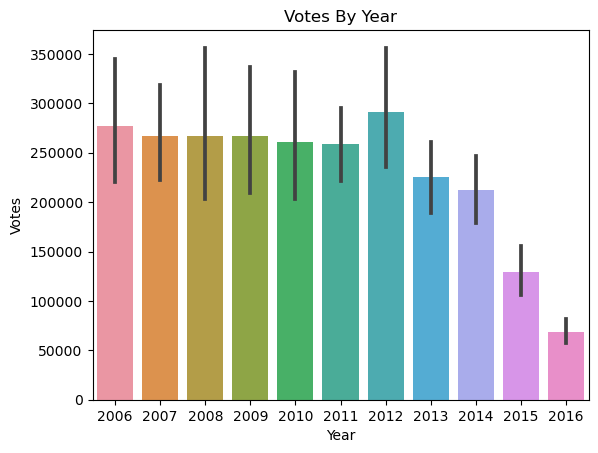

In [15]:
sns.barplot(x='Year',y='Votes',data=data_set)
plt.title("Votes By Year")
plt.show()

<Axes: xlabel='Year', ylabel='Revenue (Millions)'>

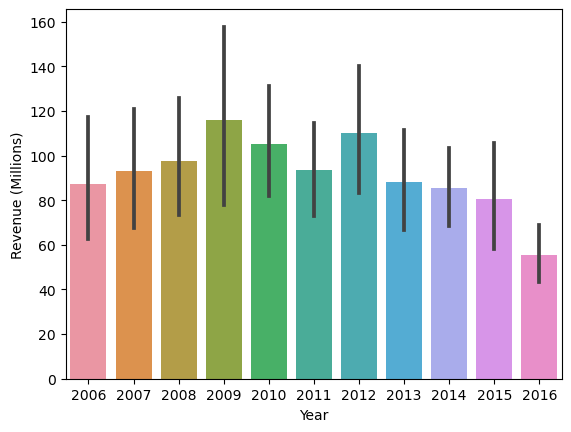

In [16]:
sns.barplot(x="Year",y="Revenue (Millions)",data=data_set)

In [17]:
data_set.groupby('Director')['Rating'].mean().sort_values(ascending=False)

Director
Christopher Nolan                   8.68
Olivier Nakache                     8.60
Makoto Shinkai                      8.60
Florian Henckel von Donnersmarck    8.50
Aamir Khan                          8.50
                                    ... 
Sam Taylor-Johnson                  4.10
Joey Curtis                         4.00
George Nolfi                        3.90
James Wong                          2.70
Jason Friedberg                     1.90
Name: Rating, Length: 524, dtype: float64

In [18]:
le=data_set.nlargest(10,'Runtime (Minutes)')[['Title','Runtime (Minutes)']].set_index('Title')

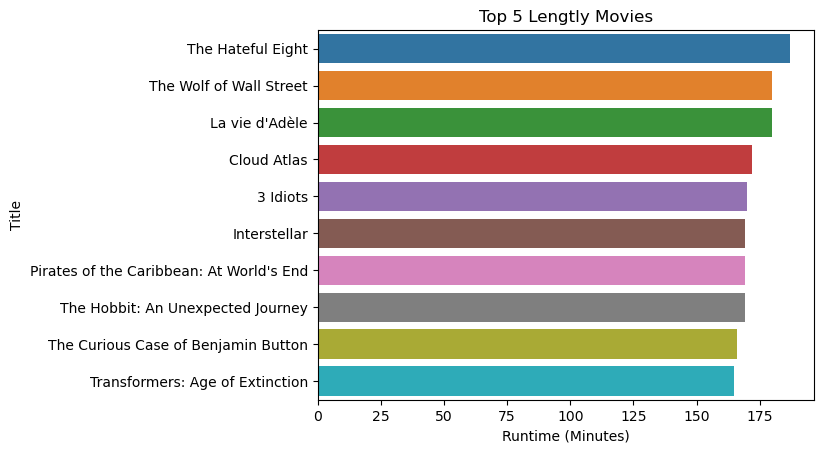

In [19]:
sns.barplot(x='Runtime (Minutes)',y=le.index,data=le)
plt.title('Top 5 Lengtly Movies')
plt.show()

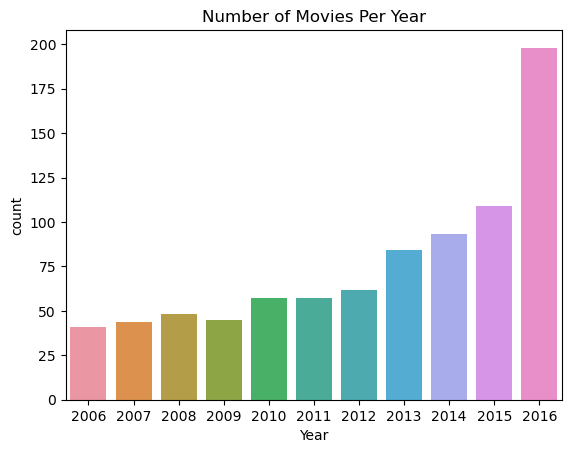

In [20]:
sns.countplot(x='Year',data=data_set)
plt.title("Number of Movies Per Year")
plt.show()

In [21]:
data_set[data_set['Revenue (Millions)'].max()==data_set['Revenue (Millions)']]['Title']

50    Star Wars: Episode VII - The Force Awakens
Name: Title, dtype: object

In [22]:
top_10=data_set.nlargest(10,'Rating')[['Title','Rating','Director']].set_index('Title')
top_10

,Rating,Director
Title,,
The Dark Knight,9.0,Christopher Nolan
Inception,8.8,Christopher Nolan
Interstellar,8.6,Christopher Nolan
Kimi no na wa,8.6,Makoto Shinkai
The Intouchables,8.6,Olivier Nakache
The Prestige,8.5,Christopher Nolan
The Departed,8.5,Martin Scorsese
The Dark Knight Rises,8.5,Christopher Nolan
Whiplash,8.5,Damien Chazelle


In [23]:
data_set.sort_values(by='Revenue (Millions)',ascending=False).head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0
87,88,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0
85,86,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0
76,77,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
12,13,Rogue One,"Action,Adventure,Sci-Fi",The Rebel Alliance makes a risky move to steal...,Gareth Edwards,"Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",2016,133,7.9,323118,532.17,65.0
119,120,Finding Dory,"Animation,Adventure,Comedy","The friendly but forgetful blue tang fish, Dor...",Andrew Stanton,"Ellen DeGeneres, Albert Brooks,Ed O'Neill, Kai...",2016,97,7.4,157026,486.29,77.0
94,95,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",When Tony Stark and Bruce Banner try to jump-s...,Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",2015,141,7.4,516895,458.99,66.0
124,125,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0
578,579,The Hunger Games: Catching Fire,"Action,Adventure,Mystery",Katniss Everdeen and Peeta Mellark become targ...,Francis Lawrence,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",2013,146,7.6,525646,424.65,76.0


In [24]:
top_10=data_set.nlargest(10,'Revenue (Millions)')[['Title','Description','Revenue (Millions)']].set_index('Title')

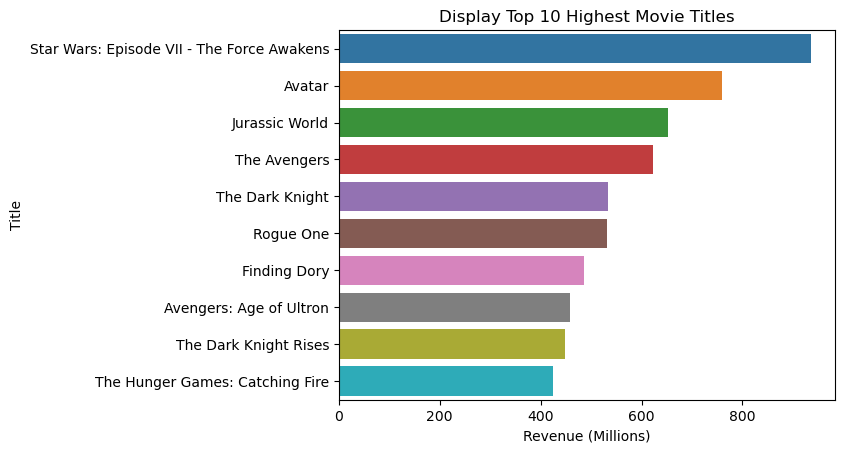

In [25]:
sns.barplot(x='Revenue (Millions)',data=top_10,y=top_10.index)
plt.title("Display Top 10 Highest Movie Titles")
plt.show()

In [26]:
data_set1=data_set.groupby('Year')[['Year','Rating']].mean().sort_values(by='Rating',ascending=False).set_index('Year')
data_set1

,Rating
Year,
2006.0,7.143902
2007.0,7.140909
2011.0,6.945614
2012.0,6.933871
2009.0,6.911111
2010.0,6.894737
2013.0,6.832143
2014.0,6.822581
2008.0,6.708333


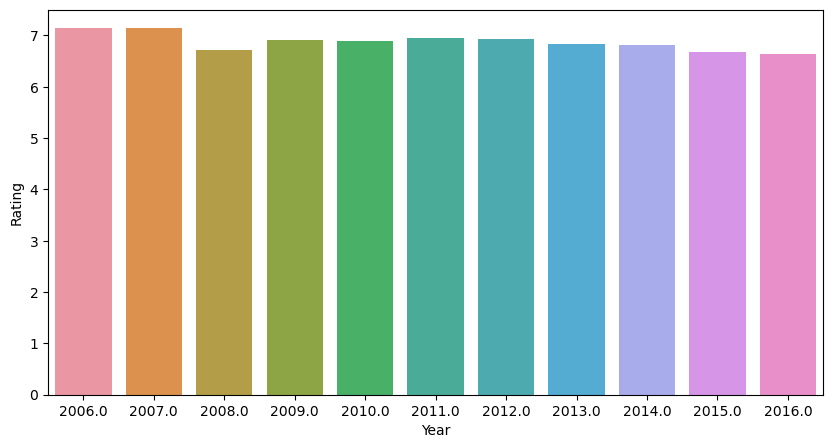

In [27]:
plt.figure(figsize=(10,5))
sns.barplot(x=data_set1.index,y=data_set1['Rating'])
plt.show()

In [28]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 838 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                838 non-null    int64  
 1   Title               838 non-null    object 
 2   Genre               838 non-null    object 
 3   Description         838 non-null    object 
 4   Director            838 non-null    object 
 5   Actors              838 non-null    object 
 6   Year                838 non-null    int64  
 7   Runtime (Minutes)   838 non-null    int64  
 8   Rating              838 non-null    float64
 9   Votes               838 non-null    int64  
 10  Revenue (Millions)  838 non-null    float64
 11  Metascore           838 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.1+ KB


<Axes: xlabel='Rating', ylabel='Revenue (Millions)'>

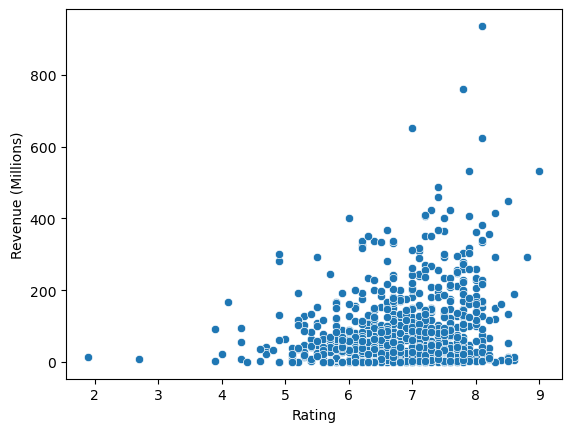

In [29]:
sns.scatterplot(x='Rating',y='Revenue (Millions)',data=data_set)

In [30]:
def rating_classification(rating):
    if rating >= 7.0:
        return "Excelent"
    elif rating >= 6.0:
        return "Good"
    else:
        return "Average"

In [31]:
data_set['Rating_Categorical']=data_set['Rating'].apply(rating_classification)

In [32]:
List_Of_Genre=[]
for value in data_set['Genre']:
    List_Of_Genre.append(value.split(','))

In [33]:
data_set['List-Genre']=List_Of_Genre

In [35]:
genre=input("Enter Genre You Want to Count: ").title()
print(f"Total no Of {genre} are {len(data_set[data_set['Genre'].str.contains(genre,case=False)])}")

Total no Of Action are 277
